# **Phicoin-Decentralized-Domain-Name-Service DDNS**

#### Phi Lab Foundation
#### **info@philab.fund**

##### Version: 0.1 

---

### Domain Structure
- **Root Domain**: `DDNS`
- **Phicoin Top Level Domains (PTLDs)**: These are the top-level domains within the Phicoin ecosystem, serving as the primary namespace for domain registration.
- **Subdomains**: Represented as a hierarchical structure:  
  `DDNS/SUB1/SUB2/SUB3/...`

---

### Phicoin Blockchain Asset Data Structure

| Field Name        | Data Type | Example                                    | Description                                                                                 |
|-------------------|-----------|--------------------------------------------|---------------------------------------------------------------------------------------------|
| `name`            | `string`  | `DDNS/A/ABC.EDF.GHI -> ABC.EDF.GHI.A.DDNS` | Unique name of the asset, typically structured hierarchically and separated by `/`.          |
| `amount`          | `number`  | `1`                                        | Total quantity of the asset currently issued.                                               |
| `units`           | `number`  | `0`                                        | Decimal precision of the asset: `0` for whole numbers, `8` for up to 8 decimal places.      |
| `reissuable`      | `boolean` | `true`                                     | Indicates whether additional units can be issued (`true`) or not (`false`).                 |
| `has_ipfs`        | `boolean` | `true`                                     | Indicates whether the asset is associated with an IPFS hash.                                |
| `*ipfs_hash`      | `string`  | `QmU2sHJKa9o5kPUJjsWFeUQbAHgtKgo8nxsfonEXWka9z1` | IPFS content identifier (CID), present if `has_ipfs` is `true`.                             |
| `or *txid_hash`   | `string`  | `0000000000000000000000000000000000000000000000000000000000000000` | Transaction hash associated with the asset's creation, useful for on-chain traceability.    |

---

### Constraints
- **Maximum Domain Length**: 30 characters.

---

### IPFS/Hash Values
#### Zero States
- **Initialization Hash**:  
  `0000000000000000000000000000000000000000000000000000000000000000`  
  Used for initializing domains.
- **Disabled Domain Hash**:  
  `Qm00000000000000000000000000000000000000000000`  
  Used for disabling domains.

#### Normal IPFS Hash
- Indicates that a domain is **enabled** and active under `DDNS`.

---

# **Domain Template**

### Type A (IPv4 Address)
```json
{
  "Type": "A",
  "Address": "192.168.1.1"
}
```

### Type AAAA (IPv6 Address)
```json
{
  "Type": "AAAA",
  "Address": "2001:db8::1"
}
```

### Type CNAME (Canonical Name)
```json
{
  "Type": "CNAME",
  "Target": "example.com"
}
```

### Type MX (Mail Exchange Record)
```json
{
  "Type": "MX",
  "MailServer": "mail.example.com",
  "TTL": 3600,
  "Priority": 10
}
```

### Define blockchain RPC communication function

In [48]:
import requests
import json

# RPC credentials and server details
rpc_user = 'phi'
rpc_password = 'phi'
server_url = 'http://127.0.0.1:28964/'
headers = {'content-type': 'text/plain;'}
ROOT_DOMAIN='DDNS'



def issue_asset(asget_name, qty=1, to_address="", change_address="", units=0, reissuable=True, has_ipfs=False, ipfs_hash=""):
    """
    Issues an asset, sub-asset, or unique asset.

    Parameters:
    - asget_name (str): The unique name of the asset.
    - qty (float): Number of units to issue (default: 1).
    - to_address (str): Address where the asset will be sent (optional).
    - change_address (str): Address where the PHI change will be sent (optional).
    - units (int): Number of decimals (default: 0, max: 8).
    - reissuable (bool): Whether the asset is reissuable (default: True).
    - has_ipfs (bool): Whether the asset includes an IPFS hash (default: False).
    - ipfs_hash (str): IPFS hash for the asset (required if has_ipfs is True).

    Returns:
    - dict: The JSON response from the server.
    """
    payload = json.dumps({
        "jsonrpc": "1.0",
        "id": "curltest",
        "method": "issue",
        "params": [
            asget_name, qty, to_address, change_address, units, reissuable, has_ipfs, ipfs_hash
        ]
    })
    try:
        response = requests.post(server_url, headers=headers, data=payload, auth=(rpc_user, rpc_password))
        return response.json()
    except Exception as e:
        print("Error issuing asset:", e)
        return None


def reissue_asset(asget_name, qty, to_address, change_address="", reissuable=True, new_units=-1, new_ipfs=""):
    """
    Reissues an existing asset.

    Parameters:
    - asget_name (str): The name of the asset being reissued.
    - qty (float): Number of additional units to reissue.
    - to_address (str): Address to send the asset to.
    - change_address (str): Address for the transaction change (optional).
    - reissuable (bool): Whether future reissuance is allowed (default: True).
    - new_units (int): New decimal precision for the asset (default: -1, no change).
    - new_ipfs (str): New IPFS hash for the asset (optional).

    Returns:
    - dict: The JSON response from the server.
    """
    payload = json.dumps({
        "jsonrpc": "1.0",
        "id": "curltest",
        "method": "reissue",
        "params": [
            asget_name, qty, to_address, change_address, reissuable, new_units, new_ipfs
        ]
    })
    try:
        response = requests.post(server_url, headers=headers, data=payload, auth=(rpc_user, rpc_password))
        return response.json()
    except Exception as e:
        print("Error reissuing asset:", e)
        return None

def register_new_domain(domain_name,to_address='Ph8GmzSXuCSbxaL44NYLMXGpWhboGAU6PL'):
        
        issue_result = issue_asset(
            asget_name=f"{ROOT_DOMAIN}/{domain_name.upper()}",
            qty=1,
            to_address=to_address,
            change_address="",
            units=0,
            reissuable=False,
            has_ipfs=True,
            ipfs_hash="0000000000000000000000000000000000000000000000000000000000000000"
        )

        return issue_result
    
def add_sub_domain(top_domain_name,sub_domain_name, to_address='Ph8GmzSXuCSbxaL44NYLMXGpWhboGAU6PL'):
    current_domain = f"{ROOT_DOMAIN}/{top_domain_name.upper()}/{sub_domain_name.upper()}"

    issue_result = issue_asset(
        asget_name=current_domain,
        qty=1,
        to_address=to_address,
        change_address="",
        units=0,
        reissuable=False,
        has_ipfs=True,
        ipfs_hash="0000000000000000000000000000000000000000000000000000000000000000"
    )

    return issue_result

def disable_domain(top_domain_name,sub_domain_name,to_address):

    current_domain = f"{ROOT_DOMAIN}/{top_domain_name.upper()}/{sub_domain_name.upper()}"
    # Create the full asset name
    # Reissue the asset with qty=0 and a new IPFS hash to disable the domain
    reissue_result = reissue_asset(
        asget_name=current_domain,
        qty=0,
        to_address=to_address,
        change_address="",
        reissuable=True,
        new_units=-1,
        new_ipfs="Qm00000000000000000000000000000000000000000000"
    )
    return reissue_result

def set_domain_record(top_domain_name,sub_domain_name,to_address,record_ipfs):
    current_domain = f"{ROOT_DOMAIN}/{top_domain_name.upper()}/{sub_domain_name.upper()}"
    # Reissue the asset with qty=0 and a new IPFS hash to disable the domain
    reissue_result = reissue_asset(
        asget_name=current_domain,
        qty=0,
        to_address=to_address,
        change_address="",
        reissuable=True,
        new_units=-1,
        new_ipfs=record_ipfs
    )
    return reissue_result

### Register the new top domain

In [52]:
test_top_domain = 'cool' # for testing change your domain first!

In [53]:
     
# Define test domain and subdomain

register_result = register_new_domain(test_top_domain)
print("Registering new top domain:")
print(register_result)

Registering new top domain:
{'result': ['4f2f981e26ef79ff974910c706ed0af21e22c008281d27005b279767a8d20316'], 'error': None, 'id': 'curltest'}


### Register the new sub domain www.cool.ddns

In [35]:
test_sub_domain = f'www'
# Register the new domain
print("\nAdding subdomains:")
subdomain_result = add_sub_domain(test_top_domain,test_sub_domain)
print(subdomain_result)


Adding subdomains:
{'result': ['2822e2fd12d327a7952a1e76ef214cc987ce7aed4455df36df0cd0e5f7508219'], 'error': None, 'id': 'curltest'}


### Register the new sub domain shop.cool.ddns

In [36]:
test_sub_domain = f'shop'
# Register the new domain
print("\nAdding subdomains:")
subdomain_result = add_sub_domain(test_top_domain,test_sub_domain)
print(subdomain_result)


Adding subdomains:
{'result': ['1fd3f1d57dd99e5ccd1ef2ecef3677f0951528e5572cf3dda090a02db42731fb'], 'error': None, 'id': 'curltest'}


### Register the new sub domain ipv6.cool.ddns 

In [37]:
test_sub_domain = f'ipv6'
# Register the new domain
print("\nAdding subdomains:")
subdomain_result = add_sub_domain(test_top_domain,test_sub_domain)
print(subdomain_result)


Adding subdomains:
{'result': ['21a838d4d2001ca8414a78fadf7269befa44191b9cb11f9cfc7cbe320842dcaa'], 'error': None, 'id': 'curltest'}


### Register the new sub domain mail.cool.ddns 

In [38]:
test_sub_domain = f'mail'
# Register the new domain
print("\nAdding subdomains:")
subdomain_result = add_sub_domain(test_top_domain,test_sub_domain)
print(subdomain_result)


Adding subdomains:
{'result': ['4a97c090beb420dee619ad24daf7f6fd8e478606b1372e7d80bc88848ba939fe'], 'error': None, 'id': 'curltest'}


In [39]:
# disable_result = disable_domain(test_top_domain,test_sub_domain, 'Ph8GmzSXuCSbxaL44NYLMXGpWhboGAU6PL')
# print("Disable Subdomain Result:", disable_result)
# print(set_domain_record(test_top_domain,test_sub_domain,'Ph8GmzSXuCSbxaL44NYLMXGpWhboGAU6PL','Qm00000000000000000000000000000000000000000001'))

### Defining the IPFS communication library

In [40]:
import json
import requests

# Pinata API credentials
# https://auth.pinata.cloud/ provides a free IPFS service, allowing users to upload up to 500 files with the free plan.
PINATA_API_KEY = "Your API Key"
PINATA_API_SECRET = "Your API Secret"
PINATA_JWT = "Your API JWT"


def upload_to_pinata(domain_name, data):
    """
    Upload a JSON file to Pinata and return the IPFS hash.
    """
    url = "https://api.pinata.cloud/pinning/pinJSONToIPFS"
    headers = {
        "Authorization": f"Bearer {PINATA_JWT}"
    }

    # Check for existing file and remove (optional, depending on use case)
    remove_url = "https://api.pinata.cloud/pinning/removePinFromIPFS"
    try:
        response = requests.post(remove_url, headers=headers, json={"ipfsPinHash": domain_name})
        print(f"Existing file removed: {response.status_code}")
    except Exception as e:
        print(f"Error removing existing file: {e}")

    payload = {
        "pinataContent": data,
        "pinataMetadata": {"name": f"{domain_name}.json"}
    }

    response = requests.post(url, headers=headers, json=payload)
    response_data = response.json()
    return response_data["IpfsHash"]


### Definition Domain Type Method

In [41]:
def get_A_record(ipv4_address):
    """
    Create an A record JSON.
    """
    return {"Type": "A", "Address": ipv4_address}


def get_AAAA_record( ipv6_address):
    """
    Create an AAAA record JSON.
    """
    return {"Type": "AAAA", "Address": ipv6_address}


def get_CNAME_record(cname):
    """
    Create a CNAME record JSON.
    """
    return {"Type": "CNAME", "Target": cname}


def get_MX_record( mail_server, ttl, priority):
    """
    Create an MX record JSON.
    """
    return {"Type": "MX", "MailServer": mail_server, "TTL": ttl, "Priority": priority}

### Generate domain name records

In [42]:
# Set records
a_record = get_A_record("1.2.3.4")
aaaa_record=get_AAAA_record('2001:0000:130F:0000:0000:09C0:876A:130B')
cname_record = get_CNAME_record("example.com")
mx_record = get_MX_record("mail.example.com", 3600, 10)

In [43]:
import time
# Sleep 20 seconds for Blockchain confirmation!
time.sleep(20)
print("Slept for 20 seconds")

Slept for 20 seconds


### SET  A record www.cool.ddns -> 1.2.3.4

In [44]:
# Upload to IPFS
test_sub_domain='www'
domain_name = f"{test_sub_domain}.{test_top_domain}.{ROOT_DOMAIN}"
print("Uploading to IPFS...")
ipfs_hash = upload_to_pinata(domain_name.upper(), a_record)
print(f"Uploaded IPFS Hash: {ipfs_hash}")
print(f"https://ipfs.io/ipfs/{ipfs_hash}")
# Set the domain record
print("Updating domain record on the blockchain...")
update_result = set_domain_record(test_top_domain,test_sub_domain, "Ph8GmzSXuCSbxaL44NYLMXGpWhboGAU6PL", ipfs_hash)
print(f"Domain Record Update Result: {update_result}")

Uploading to IPFS...
Existing file removed: 400
Uploaded IPFS Hash: QmUjhK839wN31BcTAjHXteVUw67F3So1yG26u3akpGCzx8
https://ipfs.io/ipfs/QmUjhK839wN31BcTAjHXteVUw67F3So1yG26u3akpGCzx8
Updating domain record on the blockchain...
Domain Record Update Result: {'result': ['0a34d9200db660b7987d0dd349f7076e42ecb2002204e92958bf200dc9cd68c2'], 'error': None, 'id': 'curltest'}


### SET  AAAA record ipv6.cool.ddns -> 2001:0000:130F:0000:0000:09C0:876A:130B

In [45]:
# Upload to IPFS
test_sub_domain='ipv6'
domain_name = f"{test_sub_domain}.{test_top_domain}.{ROOT_DOMAIN}"
print("Uploading to IPFS...")
ipfs_hash = upload_to_pinata(domain_name.upper(), aaaa_record)
print(f"Uploaded IPFS Hash: {ipfs_hash}")
print(f"https://ipfs.io/ipfs/{ipfs_hash}")
# Set the domain record
print("Updating domain record on the blockchain...")
update_result = set_domain_record(test_top_domain,test_sub_domain, "Ph8GmzSXuCSbxaL44NYLMXGpWhboGAU6PL", ipfs_hash)
print(f"Domain Record Update Result: {update_result}")

Uploading to IPFS...
Existing file removed: 400
Uploaded IPFS Hash: QmYU7JYSGUMbij5ciKjdZ9b7EqAHcC5sAFcbVjMUcqLFnf
https://ipfs.io/ipfs/QmYU7JYSGUMbij5ciKjdZ9b7EqAHcC5sAFcbVjMUcqLFnf
Updating domain record on the blockchain...
Domain Record Update Result: {'result': ['58c3cda3697b6a82073441642fdf4c8d3734e5ec150455114a5dde4ff6c0ce89'], 'error': None, 'id': 'curltest'}


### SET  CNAME record shop.cool.ddns -> example.com

In [46]:
# Upload to IPFS
test_sub_domain='shop'
domain_name = f"{test_sub_domain}.{test_top_domain}.{ROOT_DOMAIN}"
ipfs_hash = upload_to_pinata(domain_name.upper(), cname_record)
print(f"Uploaded IPFS Hash: {ipfs_hash}")
print(f"https://ipfs.io/ipfs/{ipfs_hash}")
# Set the domain record
print("Updating domain record on the blockchain...")
update_result = set_domain_record(test_top_domain,test_sub_domain, "Ph8GmzSXuCSbxaL44NYLMXGpWhboGAU6PL", ipfs_hash)
print(f"Domain Record Update Result: {update_result}")

Existing file removed: 400
Uploaded IPFS Hash: QmZ146fT9kpkUEYvQWNLwosnDJvzU1JQwoqNyUYJ95UngD
https://ipfs.io/ipfs/QmZ146fT9kpkUEYvQWNLwosnDJvzU1JQwoqNyUYJ95UngD
Updating domain record on the blockchain...
Domain Record Update Result: {'result': ['39b8574452b2b94216dba798d3f0b879f21ff70f22777de785884d460bc7fe19'], 'error': None, 'id': 'curltest'}


### SET  MX record mail.cool.ddns -> mailserver: mail.example.com, ttl: 3600, priority 10

In [47]:
# Upload to IPFS
test_sub_domain='mail'
domain_name = f"{test_sub_domain}.{test_top_domain}.{ROOT_DOMAIN}"
print("Uploading to IPFS...")
ipfs_hash = upload_to_pinata(domain_name.upper(), mx_record)
print(f"Uploaded IPFS Hash: {ipfs_hash}")
print(f"https://ipfs.io/ipfs/{ipfs_hash}")
# Set the domain record
print("Updating domain record on the blockchain...")
update_result = set_domain_record(test_top_domain,test_sub_domain, "Ph8GmzSXuCSbxaL44NYLMXGpWhboGAU6PL", ipfs_hash)
print(f"Domain Record Update Result: {update_result}")

Uploading to IPFS...
Existing file removed: 400
Uploaded IPFS Hash: Qmeqo8QU4LFfmmwpqvSpye1Gr6js2rJwcVSPfWtTJcx5pk
https://ipfs.io/ipfs/Qmeqo8QU4LFfmmwpqvSpye1Gr6js2rJwcVSPfWtTJcx5pk
Updating domain record on the blockchain...
Domain Record Update Result: {'result': ['8a294aeb3b69d68ada7cebaa718345bf893e3df3ef41dff1964ded4ee632e2a3'], 'error': None, 'id': 'curltest'}


### Successfully uploaded to IPFS

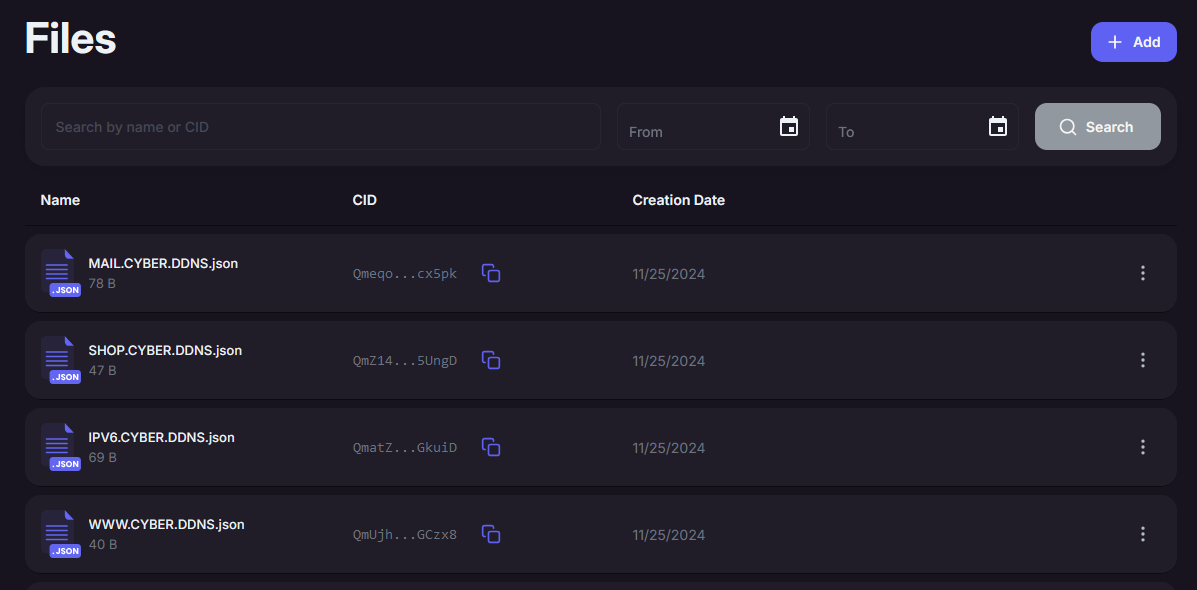

### Phicoin blockchain successfully executed

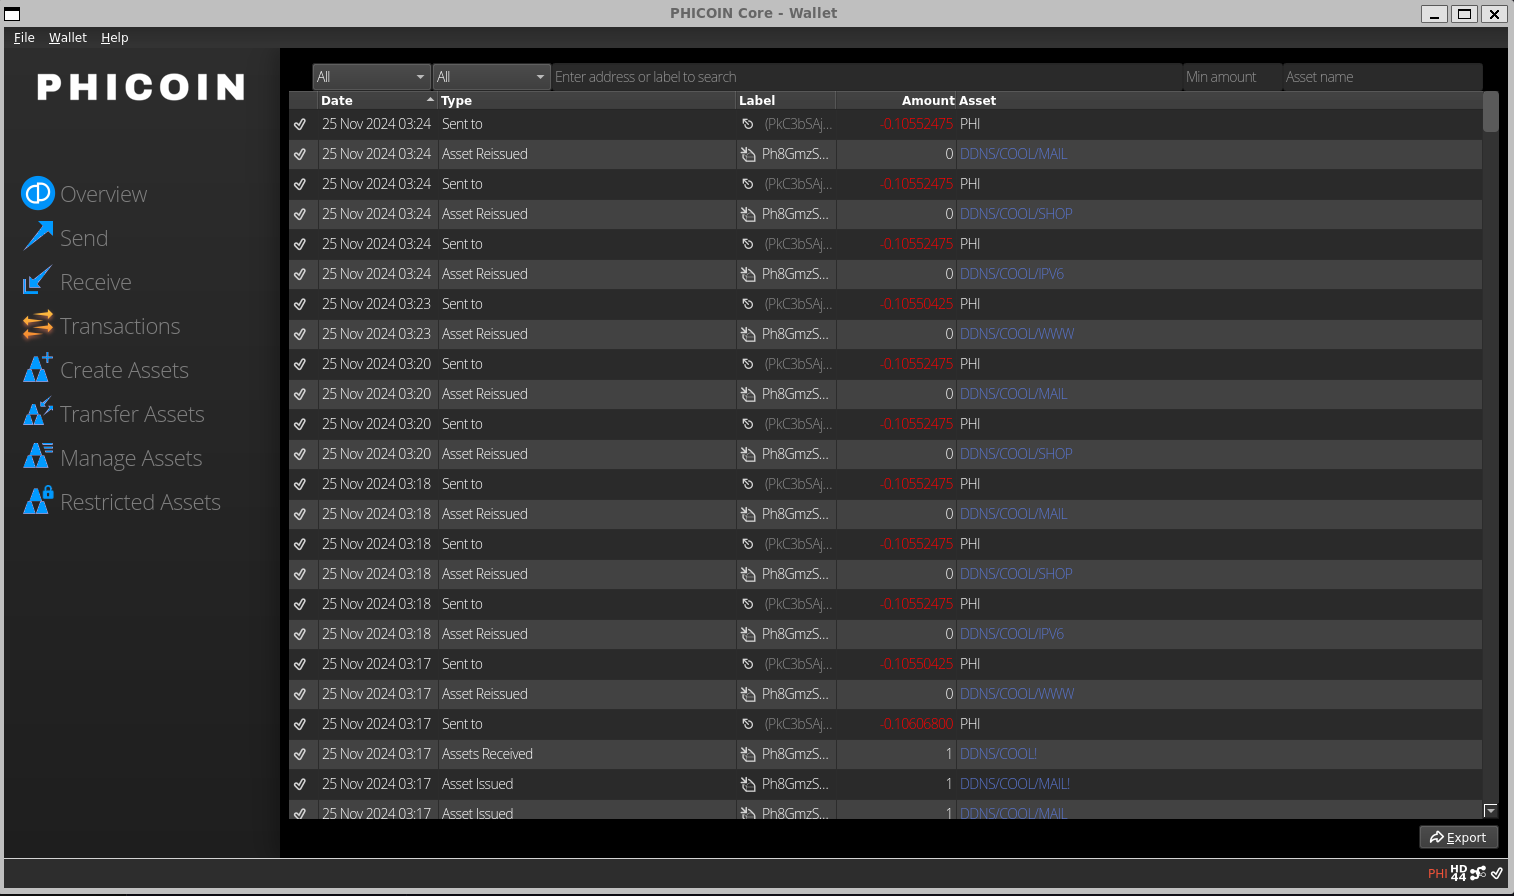

#### Run the ddnsd service and make it listen on 127.0.0.1 5553

        python ddnsd.py

#### Then run 
        nslookup -port=5553 www.cyber.ddns 127.0.0.1
        nslookup -port=5553 ipv6.cyber.ddns 127.0.0.1
        nslookup -port=5553 shop.cyber.ddns 127.0.0.1
        nslookup -port=5553 mail.cyber.ddns 127.0.0.1

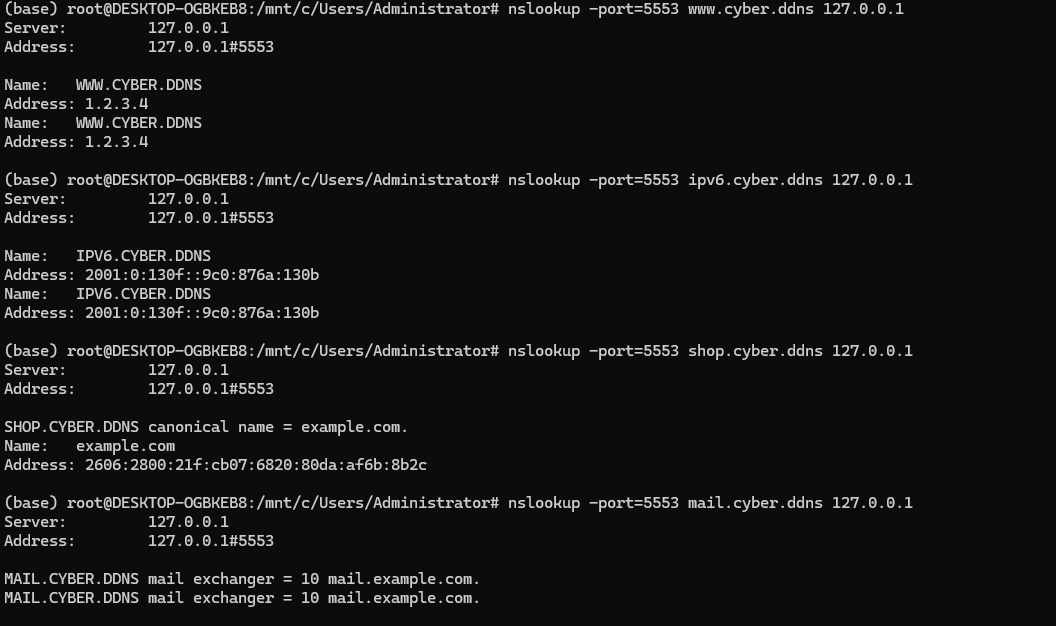